## 數據

一項實驗對5000名參與者進行了研究，以研究年齡和身體健康對聽力損失，特別是對聽到高音頻聲音的影響。這些數據顯示了研究的結果，參與者被評估並獲得身體能力分數，然後進行音頻測試（通過/不通過），以評估他們聽到高頻聲音的能力。同時記錄了參與者的年齡。是否有可能根據參與者的特徵（年齡和身體分數）建立一個模型來預測某人聽到高頻聲音的可能性？

* 特徵

    * age - 參與者的年齡（以年為單位）
    * physical_score - 身體測試中獲得的分數

* 標籤/目標

    * test_result - 如果未通過，則為0；如果通過測試，則為1+

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("hearing_test.csv")

<Axes: xlabel='test_result', ylabel='count'>

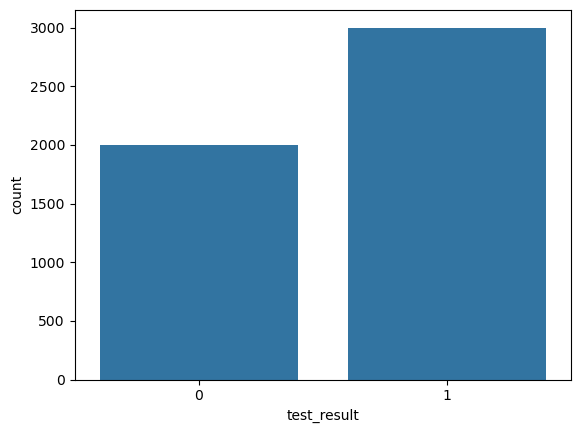

In [3]:
sns.countplot(data=df,x='test_result')

<Axes: xlabel='age', ylabel='physical_score'>

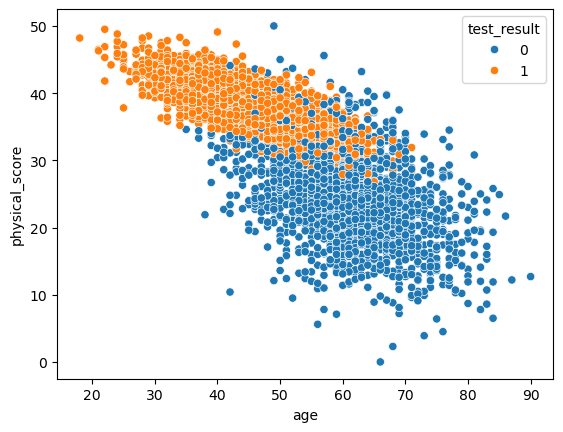

In [4]:
sns.scatterplot(x='age',y='physical_score',data=df,hue='test_result')

<Axes: >

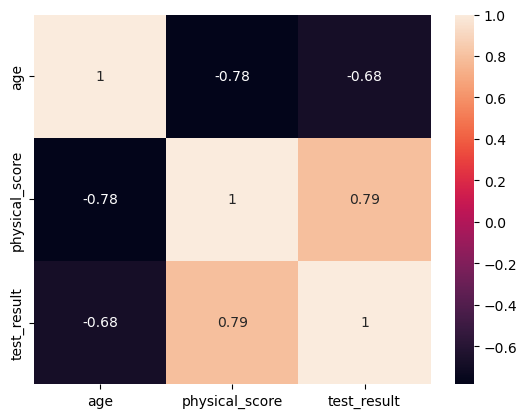

In [6]:
sns.heatmap(df.corr(),annot=True)

In [7]:
X = df.drop("test_result",axis=1)
y = df["test_result"]

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [11]:
scaler = StandardScaler()

In [12]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

## Logistic Regression Model

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
log_mode = LogisticRegression()
log_mode.fit(scaled_X_train,y_train)

LogisticRegression()

In [15]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import ConfusionMatrixDisplay

In [16]:
y_pred = log_mode.predict(scaled_X_test)
y_pred

array([1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,

In [17]:
accuracy_score(y_test,y_pred)#準確率

0.93

In [18]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



# Multi-Class Logistic Regression

In [19]:
df = pd.read_csv("./iris.csv")

In [20]:
X = df.drop('species',axis=1)
y = df['species']

In [21]:
from sklearn.linear_model import LogisticRegression

In [22]:
from sklearn.model_selection import GridSearchCV
from sklearn.multiclass import OneVsRestClassifier#分類問題轉化為多個二元分類問題

In [26]:
#saga 才可使用L1 與 L2
log_model = LogisticRegression(solver="saga",max_iter=5000)
ovr_model =  OneVsRestClassifier(log_model)

In [27]:
# Penalty types
penalty = ['l1', 'l2']
# Use logarithmically spaced C values
C = np.logspace(0, 4, 10)
#C 越小，正則化強度越大
# Create a GridSearchCV object
grid_model = GridSearchCV(ovr_model, param_grid={'estimator__C': C, 'estimator__penalty': penalty})

# Fit the model
grid_model.fit(scaled_X_train, y_train)

GridSearchCV(estimator=OneVsRestClassifier(estimator=LogisticRegression(max_iter=5000,
                                                                        solver='saga')),
             param_grid={'estimator__C': array([1.00000000e+00, 2.78255940e+00, 7.74263683e+00, 2.15443469e+01,
       5.99484250e+01, 1.66810054e+02, 4.64158883e+02, 1.29154967e+03,
       3.59381366e+03, 1.00000000e+04]),
                         'estimator__penalty': ['l1', 'l2']})

In [28]:
y_pred = grid_model.predict(scaled_X_test)

In [29]:
accuracy_score(y_test,y_pred)

0.93

In [31]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.92      0.89      0.91       193
           1       0.93      0.95      0.94       307

    accuracy                           0.93       500
   macro avg       0.93      0.92      0.93       500
weighted avg       0.93      0.93      0.93       500



## Pipeline 的好處，可以從以下幾個關鍵點進行說明：

1. **簡化代碼**：
   - 使用 `Pipeline` 可以將數據預處理、特徵選擇、降維和模型訓練的步驟整合在一起，這樣就可用一行代碼來執行這些順序性的步驟，使代碼更加整潔、易於理解和維護。

2. **避免數據洩露**：
   - 在機器學習中，數據洩露是一個常見問題，特別是在數據預處理階段。`Pipeline` 確保預處理如標準化或正規化僅使用來自訓練數據的信息，並且每次交叉驗證的時候都是獨立處理，從而避免測試數據信息在模型訓練過程中被不當使用。

3. **便於進行模型選擇和調參**：
   - `Pipeline` 可以與 `GridSearchCV` 或 `RandomizedSearchCV` 結合使用，這讓我們可以同時對轉換器和預測器的參數進行調整。這種結合使用可以在模型選擇和超參數調整階段大大提高效率。

4. **提升模型的重用性和部署**：
   - 使用 `Pipeline` 可以將所有預處理步驟和預測模型封裝成單一對象，這使得模型從開發環境到生產環境的遷移更加順暢。此外，這種封裝還有助於確保在不同數據集上應用模型時，所有步驟都會按照相同的順序和方式執行。

5. **自動化工作流程**：
   - `Pipeline` 能夠自動處理在對新數據進行預測時所需的所有步驟，如轉換和預測，用戶只需調用 `fit` 和 `predict` 方法。這減少了手動錯誤的風險，提高了工作效率。

| 欄位名稱     | 描述                                       |
|--------------|--------------------------------------------|
| MedInc       | 每個街區戶主的收入中位數，單位為萬美元          |
| HouseAge     | 每個街區中房屋的年齡中位數                       |
| AveRooms     | 每個街區中的平均房間數（總房間數除以房屋數）    |
| AveBedrms    | 每個街區中的平均臥室數（總臥室數除以房屋數）    |
| Population   | 街區的人口總數                                |
| AveOccup     | 每個家庭的平均人口數（街區人口除以房屋數）      |
| Latitude     | 街區的地理緯度                                |
| Longitude    | 街區的地理經度                                |

這些數據主要用於分析加州各地區的房價情況，其中「MedInc」作為收入指標，以及地理位置「Latitude」和「Longitude」對房價有重要影響。這些信息可以用於預測房屋價格或進行房地產市場的經濟研究。

在 `fetch_california_housing` 數據集中，目標變量（房價）的單位是「十萬美元」。這意味著數據集中的房價數值表示的是房屋價格以十萬美元為單位的值。例如，一個房價目標值為 3.0 表示該房屋的價格是 300,000 美元。

In [32]:
import pandas as pd
df = pd.read_csv("./california_housing_data.csv")
X = df.drop("target",axis=1)
y = df["target"]


In [33]:
from sklearn.model_selection import train_test_split
# 將數據分為訓練集和測試集
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

## 建立管道

In [41]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import LinearRegression
pipline = Pipeline([("scaler",StandardScaler()),
          ("regressor",LinearRegression())])

In [42]:
pipline.fit(X_train,y_train)

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [43]:
from sklearn.metrics import mean_squared_error
y_pred =  pipline.predict(X_test)
score =  mean_squared_error(y_test,y_pred)
print("score:",score)

score: 0.5289841670367208


## GridSearchCV and Pipline

In [46]:
import pandas as pd
df = pd.read_csv("./california_housing_data.csv")
X = df.drop("target",axis=1)
y = df["target"]

In [45]:
from sklearn.model_selection import train_test_split, GridSearchCV
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [47]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import  StandardScaler
from sklearn.linear_model import Ridge
pipeline = Pipeline([("scaler",StandardScaler()),
                     ("ridge",Ridge())])#L2

In [48]:
pipeline

Pipeline(steps=[('scaler', StandardScaler()), ('ridge', Ridge())])

In [54]:
parameters = {
    "ridge__alpha":[0.1,1.0,10.0,15,16.0,17.0,20.0,30.0]
}
grid_search =  GridSearchCV(pipeline,parameters,cv = 5)
grid_search.fit(X_train,y_train)

print("best_params_:",grid_search.best_params_)

best_params_: {'ridge__alpha': 17.0}


In [55]:
from sklearn.metrics import mean_squared_error
y_pred =  grid_search.predict(X_test)
score =  mean_squared_error(y_test,y_pred)
print(score)

0.529209103528189


# KNN - K最近鄰居 - 分類

In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [57]:
df = pd.read_csv("./gene_expression.csv")

<Axes: xlabel='Gene One', ylabel='Gene Two'>

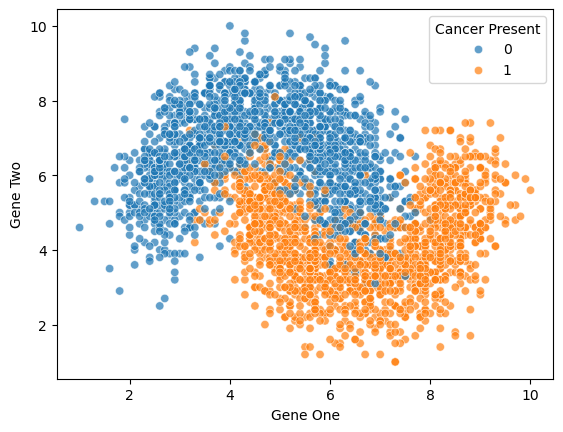

In [58]:
sns.scatterplot(x='Gene One',y='Gene Two',hue='Cancer Present',data=df,alpha=0.7)

## Train|Test Split and Scaling Data

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [60]:
X = df.drop("Cancer Present",axis=1)
y = df["Cancer Present"]

In [61]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [62]:
scaler = StandardScaler()

In [63]:
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [69]:
from sklearn.neighbors import KNeighborsClassifier
knn_model = KNeighborsClassifier(n_neighbors = 1)
knn_model.fit(scaled_X_train,y_train)

KNeighborsClassifier(n_neighbors=22)

## 預測

In [70]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score
y_pred = knn_model.predict(scaled_X_test)
accuracy_score(y_test,y_pred)

0.9488888888888889

In [67]:
from sklearn.metrics import accuracy_score
test_error_rates = []
for k in range(1,30):
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(scaled_X_train,y_train)
    y_pred_test = knn_model.predict(scaled_X_test)
    test_error = 1 - accuracy_score(y_test,y_pred_test)
    test_error_rates.append(test_error)

In [71]:
c = 1
for i in test_error_rates:
    print(c,i)
    c+=1

1 0.09888888888888892
2 0.09777777777777774
3 0.07333333333333336
4 0.0755555555555556
5 0.07222222222222219
6 0.06444444444444442
7 0.06444444444444442
8 0.061111111111111116
9 0.05777777777777782
10 0.06222222222222218
11 0.061111111111111116
12 0.06000000000000005
13 0.061111111111111116
14 0.06222222222222218
15 0.05888888888888888
16 0.05777777777777782
17 0.05666666666666664
18 0.05555555555555558
19 0.05222222222222217
20 0.053333333333333344
21 0.054444444444444406
22 0.05111111111111111
23 0.054444444444444406
24 0.054444444444444406
25 0.05666666666666664
26 0.05555555555555558
27 0.05555555555555558
28 0.05777777777777782
29 0.05666666666666664


Text(0.5, 0, 'K Value')

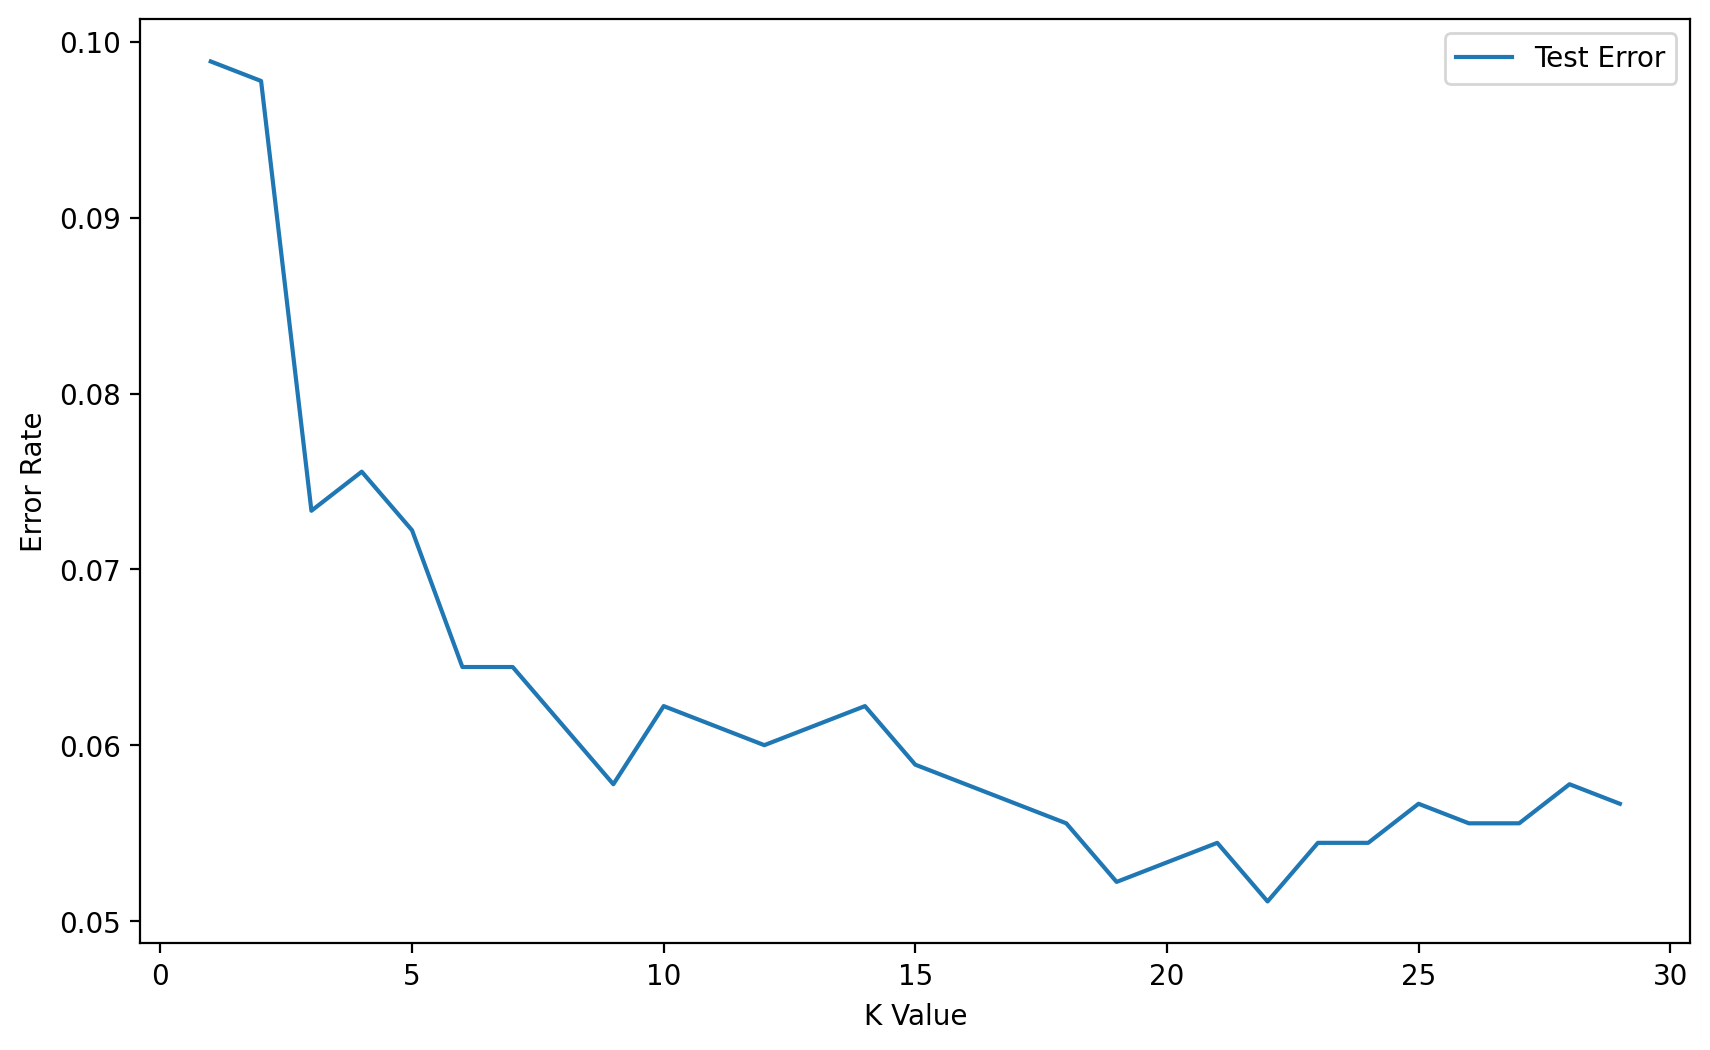

In [72]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,6),dpi=200)
plt.plot(range(1,30),test_error_rates,label='Test Error')
plt.legend()
plt.ylabel('Error Rate')
plt.xlabel("K Value")